# Fixed Income Derivatives - Vasicek Model Example
In this problem, we will consider the Vasicek model, in which the short rate $r_t$ is assumed to have the following dynamics under the risk-neutral measure $\mathbb{Q}$:
$$
dr_t = (b - r_t) dt + \sigma dW_t
$$
where $a$, $b$, and $\sigma$ are model parameters.

In [1]:
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm


# add the directory where fixed_income_derivatives.py is located to the system path
import sys
import os
sys.path.append(os.path.abspath("../../Files"))

# import own module
import fixed_income_derivatives_E2024 as fid
import plotting as plot

%load_ext autoreload
%autoreload 2

## Problem 1 - Solution and distribution of $r_t$
***See ChatGPT for proposed solution***

#### (a) Find the solution for $r_t$, $t > 0$, in the Vasicek model

#### (b) Find the mean $\mathbb{E}[r_t]$ and the variance $Var[r_t]$ of $r_t$. There is a ’trick’ involved when computing the variance, what is that trick called?
The trick is Ito's isometry

#### (c) Find the distribution of $r_t$.

#### (d) Find the distribution of $r_t$ as $t \to \infty$. That is find the stationary distribution of $r_t$.

## Problem 2 - Solution and distribution of $P(t,T)$
***See ChatGPT for proposed solution***

#### (a) Argue that ZCB prices in the Vasicek model possess an affine term structure and are of the form $$p(t,T) = F(t,T,r) = e^{A(t,T) - B(t,T)r}$$

#### (b) Show that $A(t,T)$ and $B(t,T)$ solve the following system of ODE’s $$ \begin{split} B_t &= -1+ aB, \quad B(T,T) = 0 \\ A_t &= bB - \frac{1}{2}\sigma^2B^2, \quad A(T,T) = 0 \end{split} $$ and solve this system to show that $$ \begin{split} A(t,T) &= \frac{1}{4a^2}\left[2(\sigma^2-2ab)(T-t)+2(2ab-\sigma^2)B(t,T)-a\sigma^2B^2(t,T)\right] \\ B(t,T) &= \frac{1}{a}\left[1-e^{-a(T-t)}\right] \end{split} $$

#### (c) Find the distribution of $\ln{P(t,T)\mid \mathcal{F}_0}$.

#### (d) Consider a European call option with strike $K$ and maturity $T_1$ written on a ZCB with maturity $T_2$, $T_1 < T_2$. Argue why there must be a Black-Scholes type of formula for the price, $\Pi$ of this call option and that it is given by $$\Pi = p(0,T_2)\Phi(d_1) - Kp(0,T_1)\Phi(d_2)$$ where $$d_1 = \frac{\ln\left(\frac{p(t,T_2)}{Kp(t,T_1)}\right) +\frac{1}{2}\Sigma^2}{\sqrt{\Sigma^2}}, \qquad d_2 = \frac{\ln\left(\frac{p(t,T_2)}{Kp(t,T_1)}\right) -\frac{1}{2}\Sigma^2}{\sqrt{\Sigma^2}}$$ and $$\Sigma^2 = \frac{\sigma^2}{2a^3}\left[1-e^{-2a(T_1-t)}\right]\left[1-e^{-2a(T_2-T_1)}\right]^2$$

#### (e) Use the put-call parity to show that the price $\Psi$ of a European put option with same strike $K$, same maturity $T_1$ and same time $T_2$ ZCB as the underlying is given by $$\Psi = Kp(0,T_1)\Phi(-d_2) - p(0,T_2)\Phi(-d_1)$$

#### (f) Show that the $t = 0$ price of a caplet on the Libor rate $L(T_{i−1},T_i)$ with principal amount $K$ and strike $R$ can be expressed in terms of a European put option. In particular, show that the price of such a caplet can be found as the value of $K[1 + (T_i −T_{i−1})R]$ European put options with strike $K = \frac{1}{1+(T_i-T_{i-1})R}$.

## Problem 3 - Fitting a Vasicek model to data
Assume you have fitted the ZCB yield curve and have gotten the results for continuously compounded spot rates and maturities shown in the file `vasicek_model_example.py`.

#### (a) Using the initial values $r_0 = 0.03$, $a = 0.5$, $b = 0.04$ and $\sigma = 0.04$, fit a Vasicek model to the spot rates given above

In [2]:
T = np.array([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75,
5, 5.25, 5.5, 5.75, 6, 6.25, 6.5, 6.75, 7, 7.25, 7.5, 7.75, 8, 8.25, 8.5, 8.75, 9, 9.25, 9.5, 9.75, 10])
R = np.array([0.036, 0.03711, 0.03797, 0.03875, 0.03946, 0.0401, 0.04069, 0.04122, 0.04171, 0.04216, 0.04257, 0.04294, 0.04329,
0.0436, 0.0439, 0.04417, 0.04441, 0.04464, 0.04486, 0.04506, 0.04524, 0.04541, 0.04557, 0.04572, 0.04586, 0.04599, 0.04611,
0.04622, 0.04633, 0.04643, 0.04653, 0.04662, 0.0467, 0.04678, 0.04686, 0.04693, 0.047, 0.04706, 0.04712, 0.04718, 0.04724])
param0 = 0.03, 0.5, 0.04, 0.04 # initial guess for the parameters, he uses 0.03, 0.5, 0.04, 0.03
results = minimize(fid.fit_vasicek_obj,param0,method='nelder-mead',args=(R,T),options={'xatol':1e-20,'disp':False})
r0, a, b, sigma = results.x
print(f'Parameters from fit:\nr0 = {r0}\na = {a}\nb = {b}\nsigma = {sigma}')

Parameters from fit:
r0 = 0.035999999998964416
a = 0.6004211173834075
b = 0.030010295772125425
sigma = 0.0196880381184572


#### (b) Plot the ZCB prices, spot rates and instantaneous forward rates for values of $t \in [0,10]$.

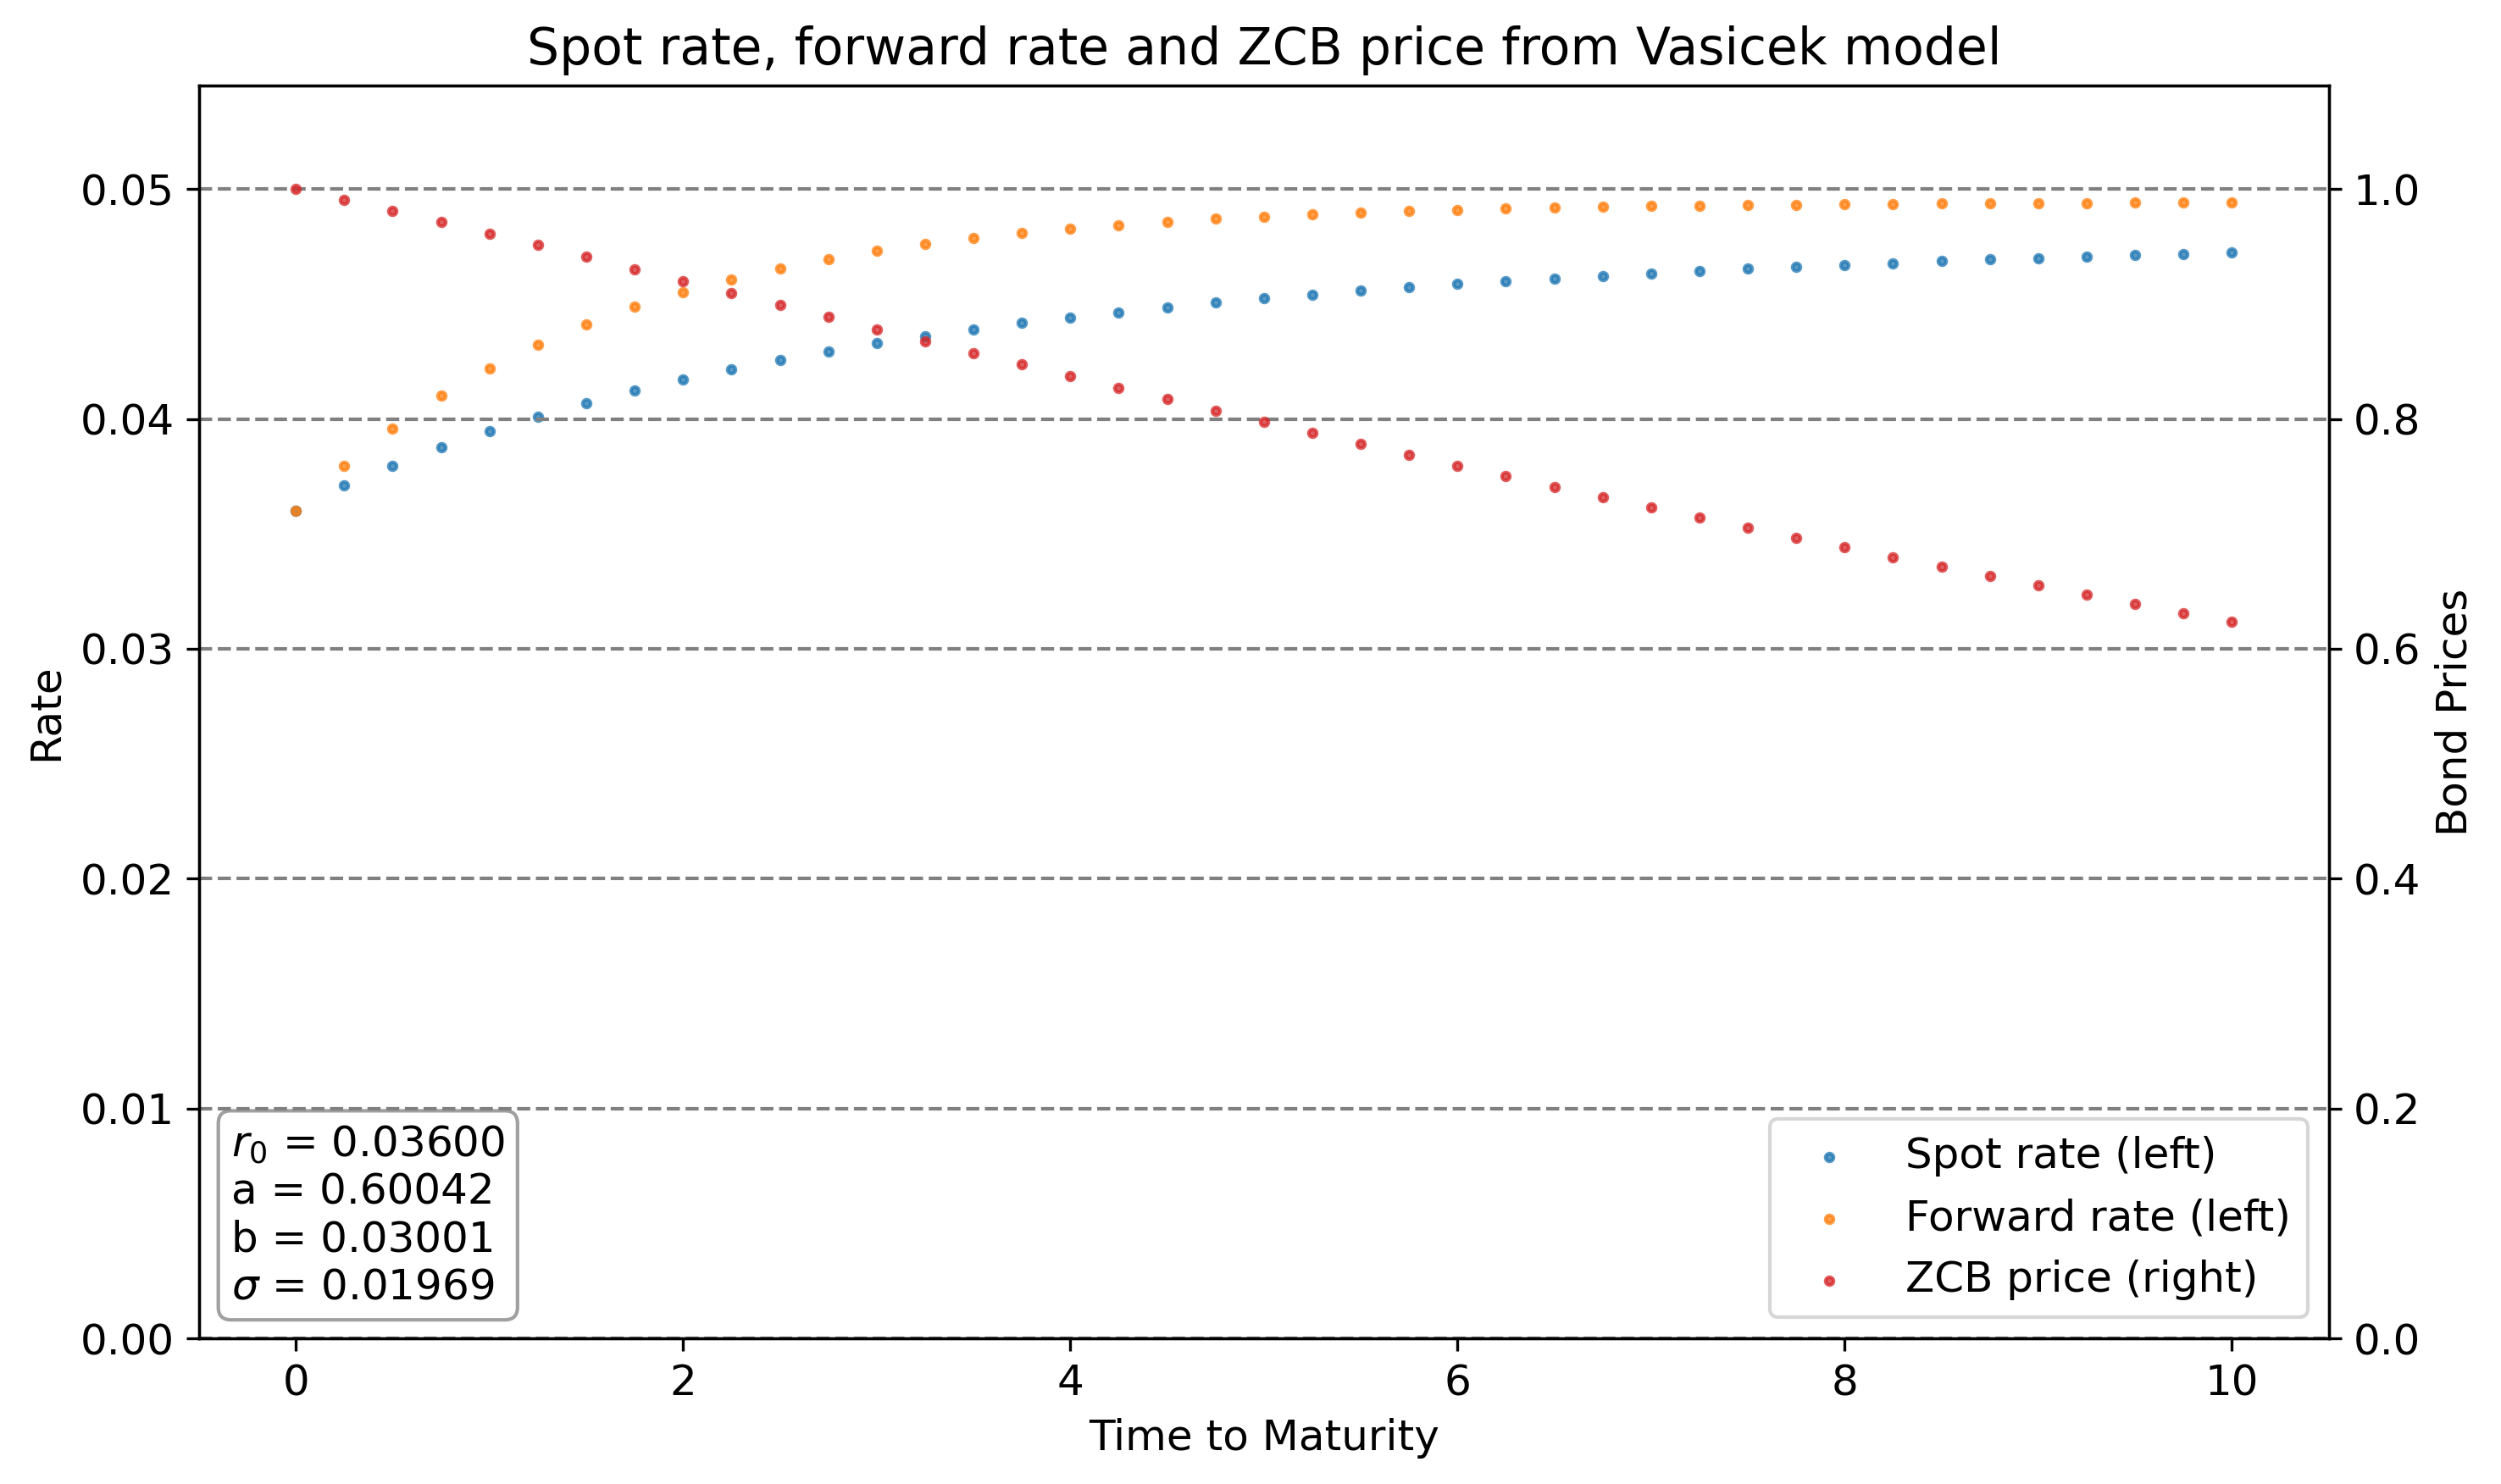

In [3]:
p = fid.zcb_price_vasicek(r0, a, b, sigma, T)
f = fid.forward_rate_vasicek(r0, a, b, sigma, T)

left_axis = [{'label': 'Spot rate','x':T,'y':R},
             {'label':'Forward rate','x':T,'y':f}]
right_axis = [{'label':'ZCB price','x':T,'y':p}]
text = {'$r_0$':r0,'a':a,'b':b,'$\sigma$':sigma}
plot.rates(left_axis, right_axis,title='Spot rate, forward rate and ZCB price from Vasicek model',text=text)

#### (c) Assuming that the market can be described by the Vasicek model with the parameter estimates found in a), compute par swap rates for swaps exchanging three month floating Libor for a fixed rate paid annually. Compute swap rates for maturities $T \in [1,2,3,4,5,6,7,8,9,10]$ and include these swap rates in your plot from b). You will notice that par swap rates are very close to ZCB spot rates. Is that a ’coincidence’ or is there a better explanation?

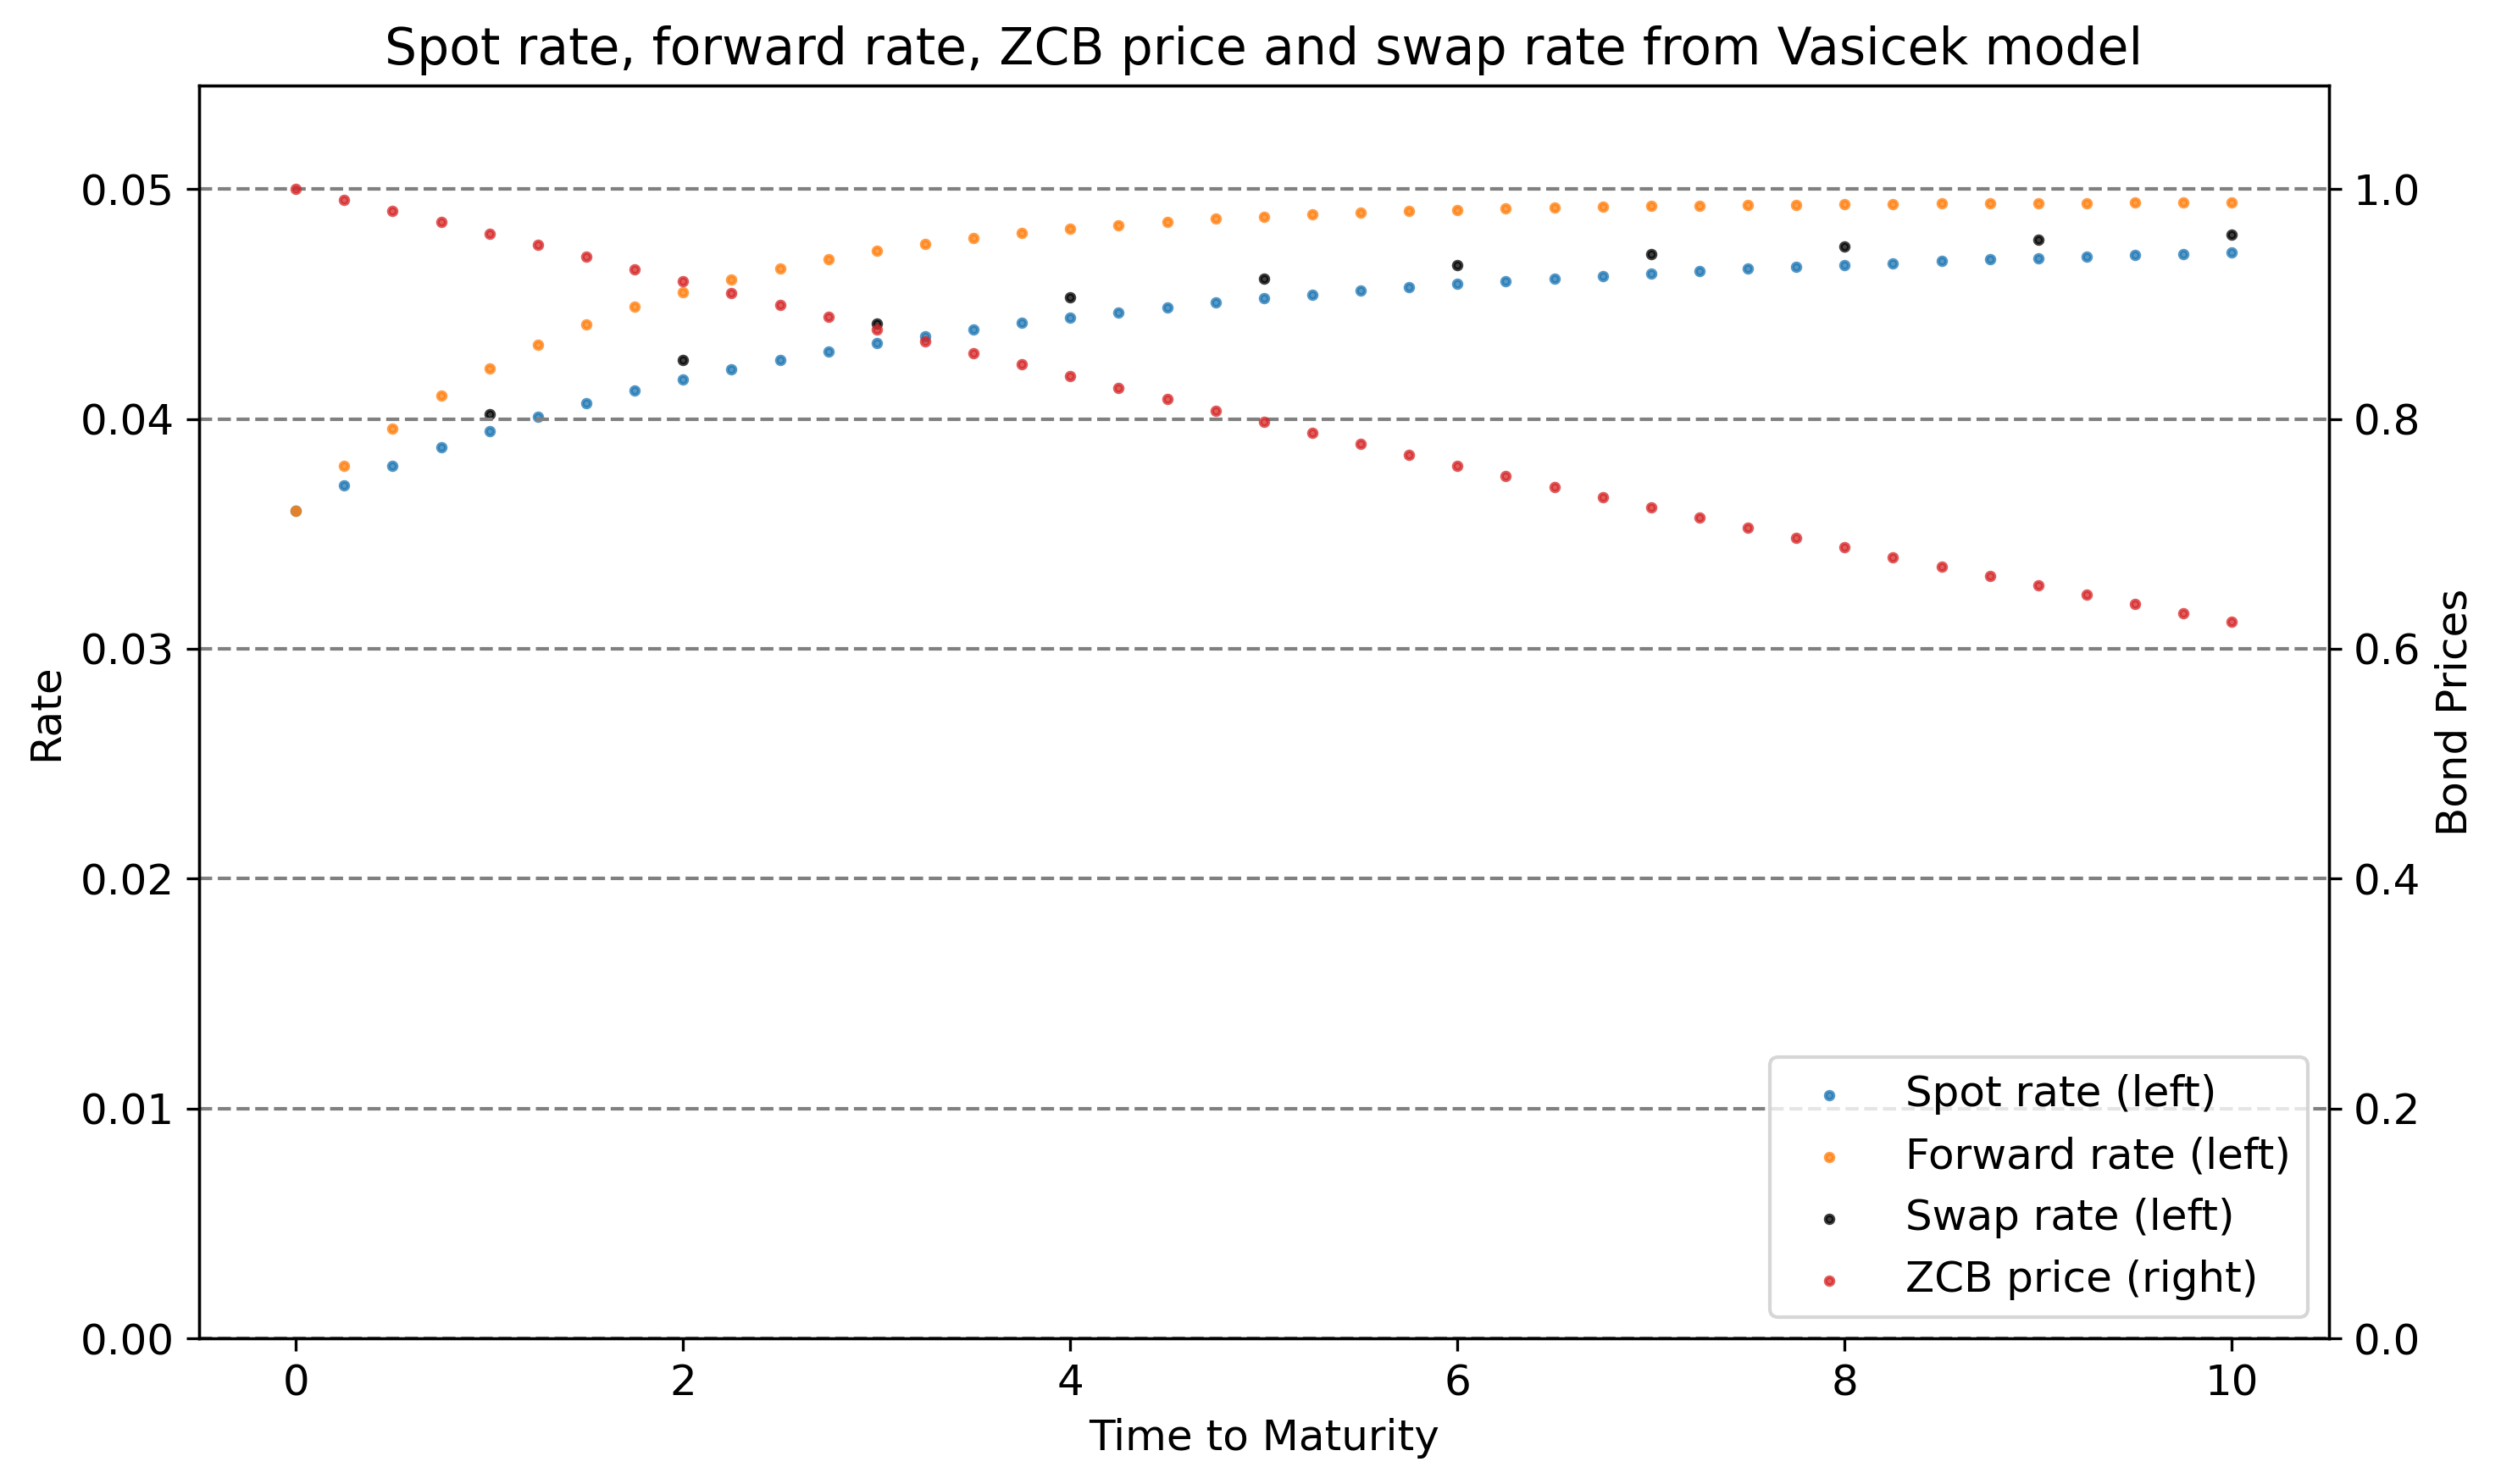

In [4]:
T_swap = [1,2,3,4,5,6,7,8,9,10]
R_swap = np.zeros([10])
for i in range(0,10):
    R_swap[i] = fid.swap_rate_from_zcb_prices(0,0,T_swap[i],"annual",T,p)[0]

left_axis.append({'label':'Swap rate','x':T_swap,'y':R_swap,'color':'black'})
plot.rates(left_axis, right_axis,title='Spot rate, forward rate, ZCB price and swap rate from Vasicek model')

#### (d) Compute $3M$ forward rates and plot these in a separate plot where you also plot the $10Y$ par swap rate as a straight line. What can be said about the relationship between $3M$ forward rates and the 10 par swap rate?

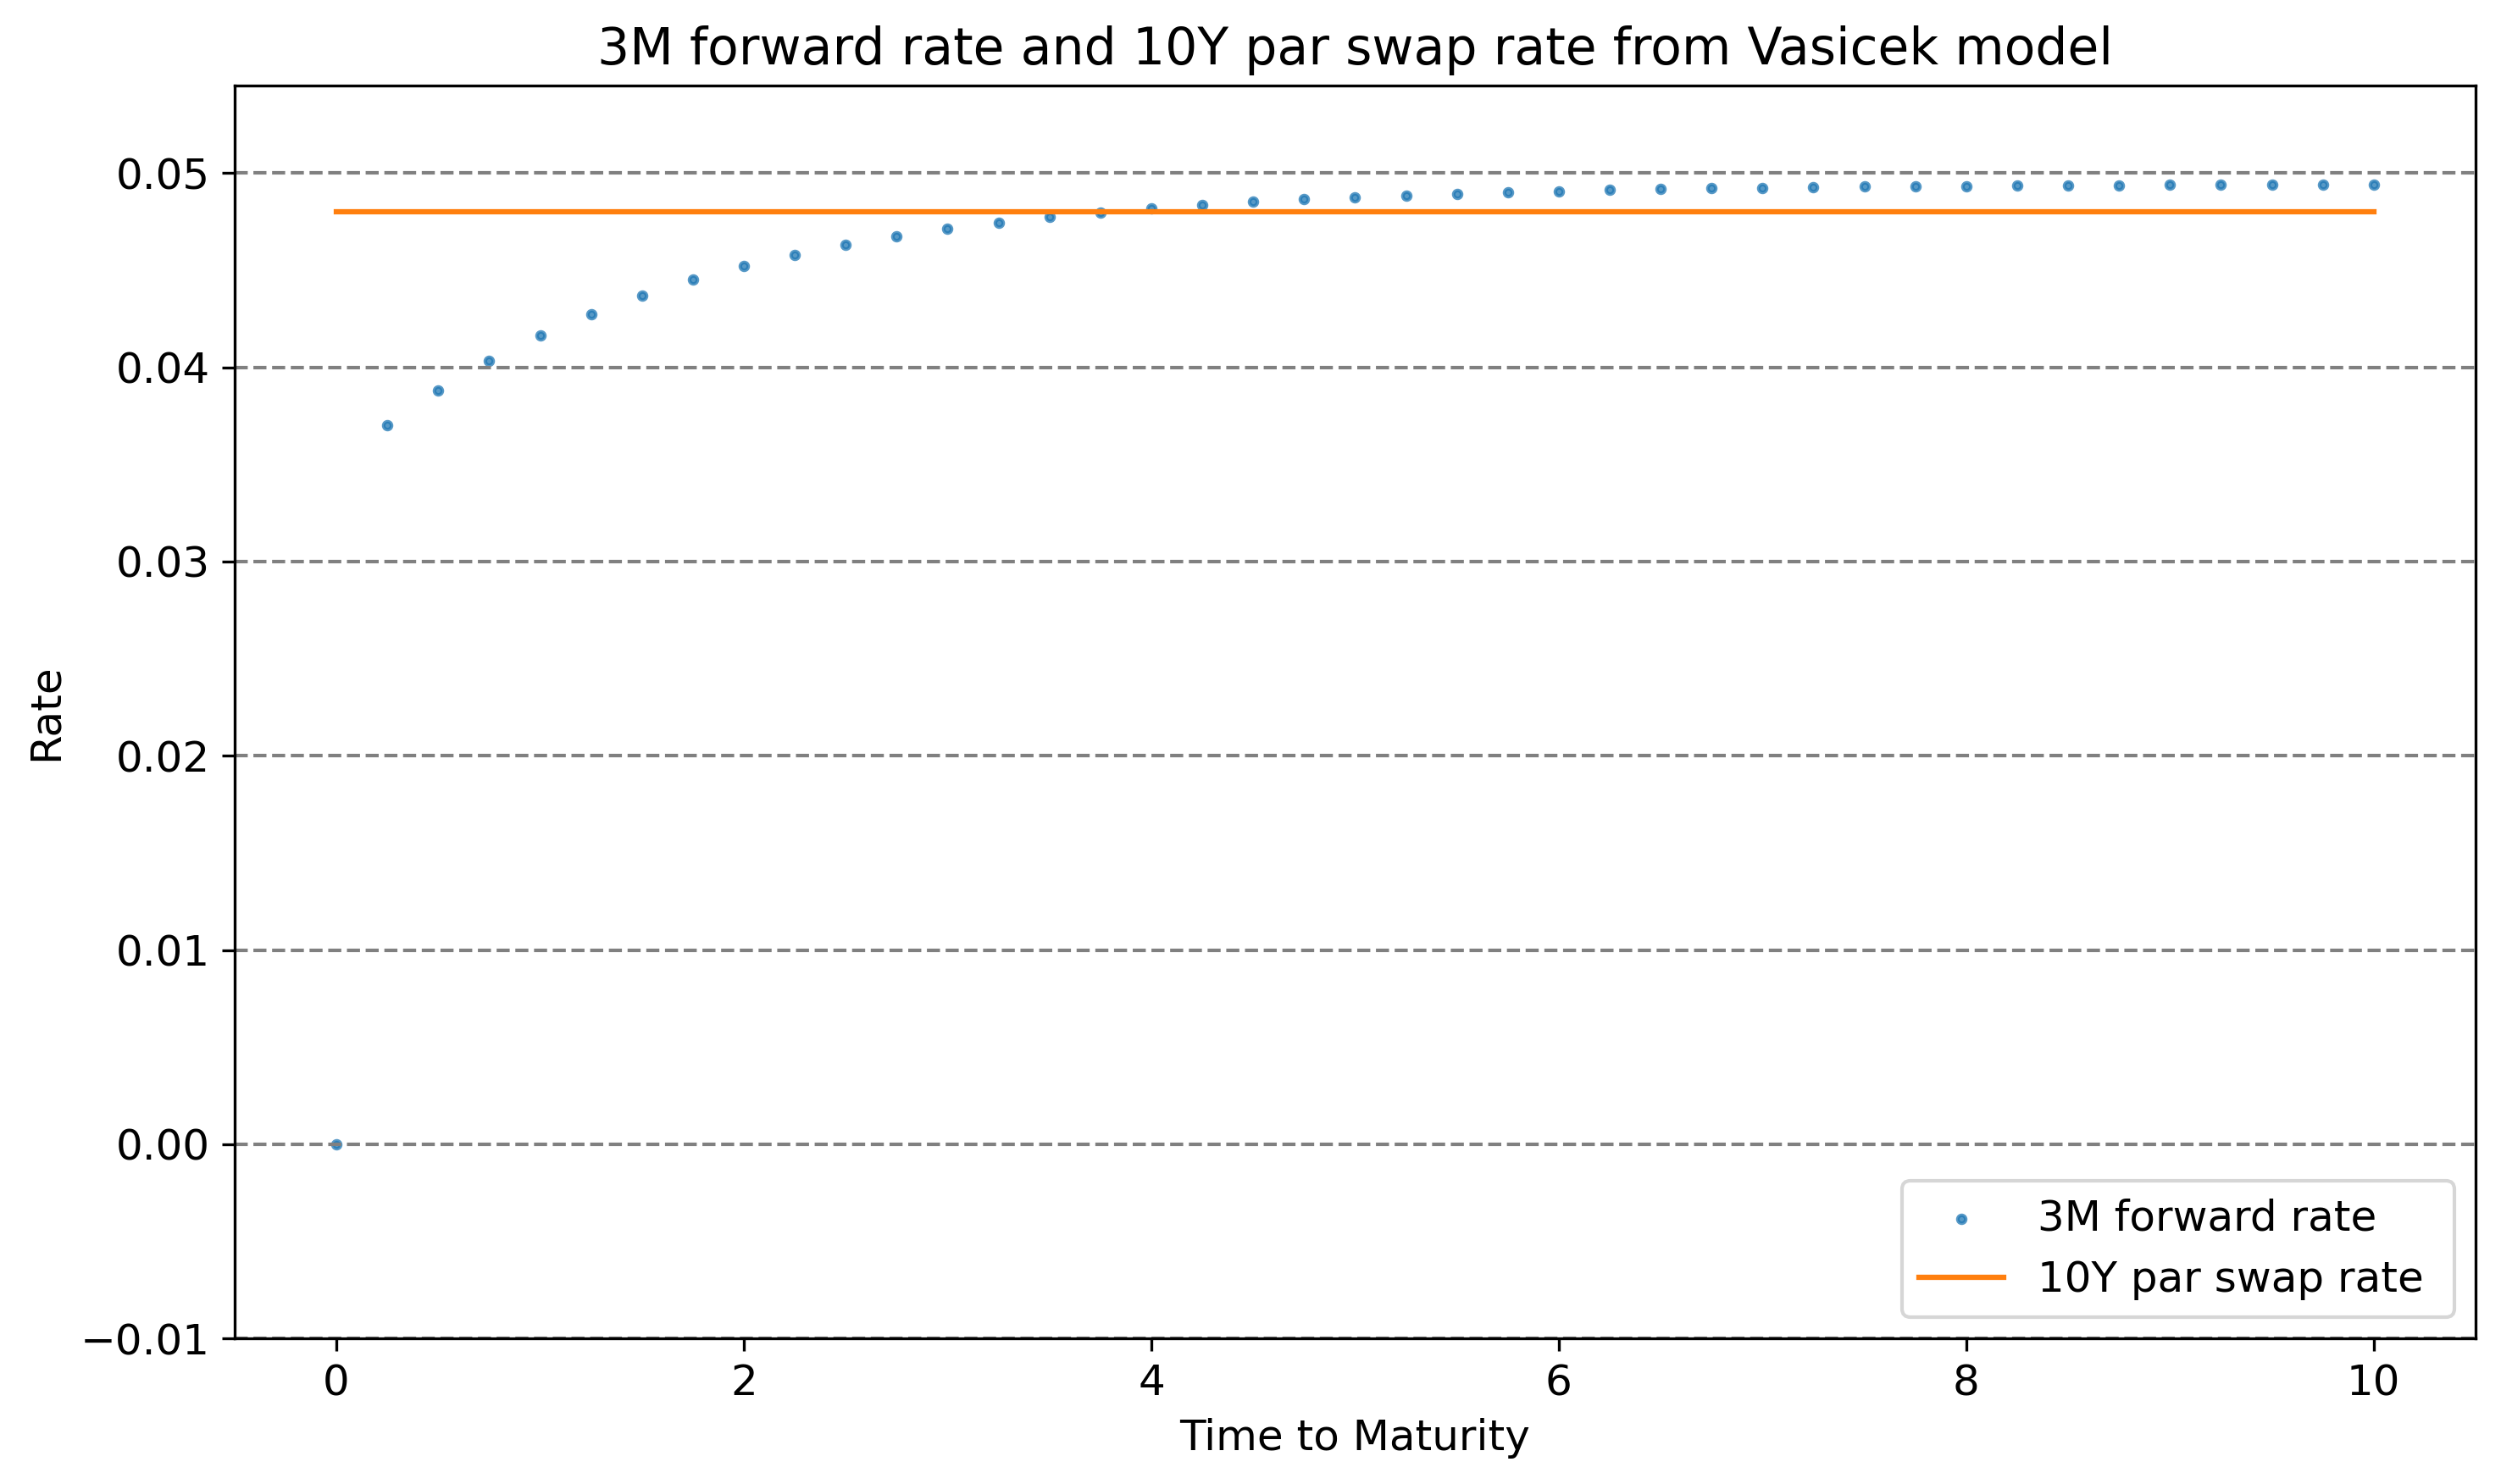

In [5]:
f_3m = fid.forward_rates_from_zcb_prices(T,p,horizon = 1)
plot_3m = [{'label':'3M forward rate','x':T,'y':f_3m},
           {'label':'10Y par swap rate','x':T,'y':R_swap[-1]*np.ones_like(T),'type':'line'}]
plot.rates(plot_3m,title='3M forward rate and 10Y par swap rate from Vasicek model')

## Problem 4 - Pricing an interest rate cap
We will now consider the pricing of an interest rate cap

#### (a) Explain the relationship between a caplet on an individual Libor rate payment and also explain, how a caplet can be seen as a type of European option on a specific underlying asset.

#### (b) Compute the prices of all caplets on $3M$ forward Libor that corresponding to the $10Y$ receiver swap paying $3M$ Libor on the floating leg in exchange for an annual fixed rate.

In [6]:
strike = R_swap[-1]
alpha = 0.25
M = int(10/alpha) + 1
price_caplet = fid.caplet_prices_vasicek(sigma, strike, a, T, p)
print(f"Caplet prices assuming strike is equal to the 10Y par swap rate (bps): \n{10000*price_caplet}")

Caplet prices assuming strike is equal to the 10Y par swap rate (bps): 
[ 0.          0.          1.58517611  4.19233114  6.41600484  8.21897376
  9.66686475 10.82531119 11.74884632 12.48131177 13.0578023  13.50649679
 13.85013396 14.10715941 14.2926115  14.41880745 14.495878   14.53218687
 14.53466208 14.50905938 14.46017313 14.39200596 14.30790608 14.21067905
 14.102679   13.98588368 13.86195612 13.73229578 13.59808091 13.46030383
 13.31980034 13.17727437 13.03331856 12.88843161 12.74303282 12.59747438
 12.45205166 12.30701199 12.16256198 12.01887381 11.87609043]


#### (c) Compute the price of a $10Y$ interest rate cap with strike $K = 0.05$ on $3M$ Libor and express the price of this cap both in terms of an upfront payment as well as a premium to be paid quarterly for 10 years.

In [7]:
strike = 0.05
price_caplet = fid.caplet_prices_vasicek(sigma, strike, a, T, p)
print(f"Caplet prices assuming strike is equal to 0.05% (bps): \n{10000*price_caplet}")
price_cap = sum(price_caplet[2:])
S_swap = fid.accrual_factor_from_zcb_prices(0,0,T[-1],"quarterly",T,p)
premium_cap = alpha*(price_cap/S_swap)
print(f"price_cap: {10000*price_cap}, premium_cap: {10000*premium_cap}")

Caplet prices assuming strike is equal to 0.05% (bps): 
[ 0.          0.          0.99364994  3.10107963  5.03401409  6.6471223
  7.96254035  9.0252217   9.87839525 10.55906235 11.09785079 11.51984567
 11.84554199 12.09169808 12.2720469  12.39787311 12.47847658 12.52154361
 12.53344442 12.51947201 12.48403465 12.43081157 12.36287925 12.28281446
 12.19277843 12.09458609 11.98976303 11.87959262 11.7651551  11.64736006
 11.52697357 11.40464075 11.28090479 11.15622283 11.03097931 10.90549725
 10.78004768 10.65485769 10.53011713 10.40598435 10.282591  ]
price_cap: 415.56747039531535, premium_cap: 13.013280615687668


#### (d) Suppose a company has a floating rate loan in which the pay $3M$ Libor $+ 200$ bps and that the company is afraid that $3M$ Libor will exceed 0.05 in the future. Explain how they can mitigate that risk using either the $10Y$ interest rate swap or the 10Y interest rate cap with a strike of $0.05$ from the previous question. Explain the pros and cons of each type of agreement and also calculate the total cost to the company in both cases

#### (e) Investigate how the price of the cap depends on $\sigma$ and compute the DV01 of changing $\sigma$ by $0.001$ both up and down. Is the DV01 you have computed a first-order approximation or is it exact? Can both exact and approximated values be computed?

In [8]:
price_caplet_down = fid.caplet_prices_vasicek(sigma-0.001,strike,a,T,p)
price_cap_down = sum(price_caplet_down[2:])
premium_cap_down = alpha*(price_cap_down/S_swap)
print(f"price_cap_down: {10000*price_cap_down}, premium_cap_down: {10000*premium_cap_down}")
price_caplet_up = fid.caplet_prices_vasicek(sigma+0.001,strike,a,T,p)
price_cap_up = sum(price_caplet_up[2:])
premium_cap_up = alpha*(price_cap_up/S_swap)
print(f"price_cap_up: {10000*price_cap_up}, premium_cap_up: {10000*premium_cap_up}")

price_cap_down: 391.3007322240507, premium_cap_down: 12.253380248246284
price_cap_up: 439.9035094986014, premium_cap_up: 13.775351106008172


## Problem 5 - Simulating the Vasicek model
Next we will simulate short rates in the Vasicek model using the usual first order Euler scheme on a grid of mesh $\delta$ that runs from initial time $t_0 = 0$ to terminal time $T = 10$. Denote by $M$, the number of steps in your simulation. The time points in your simulation will be numbered $m = 0,1,2,...,M −1,M$, the time points will be $[t_0,t_1,...,t_{M−1},t_M] = [0,\delta,2\delta,...,T −\delta,T]$ and $\delta = \frac{T}{M}$. The scheme you will need to implement is a simple Euler first-order scheme of the form
$$
r_m = r_{m-1} + (b-ar_{m-1})\delta + \sigma\sqrt{\delta}Z_m, \quad m = 1,2,...,M
$$
where $Z_m \sim N(0,1)$, $m=1,2,...,M$ and all the standard normal random variables are independent.

#### (a) Simulate one trajectory of the short rate and plot the trajectory up to time $T = 10$.

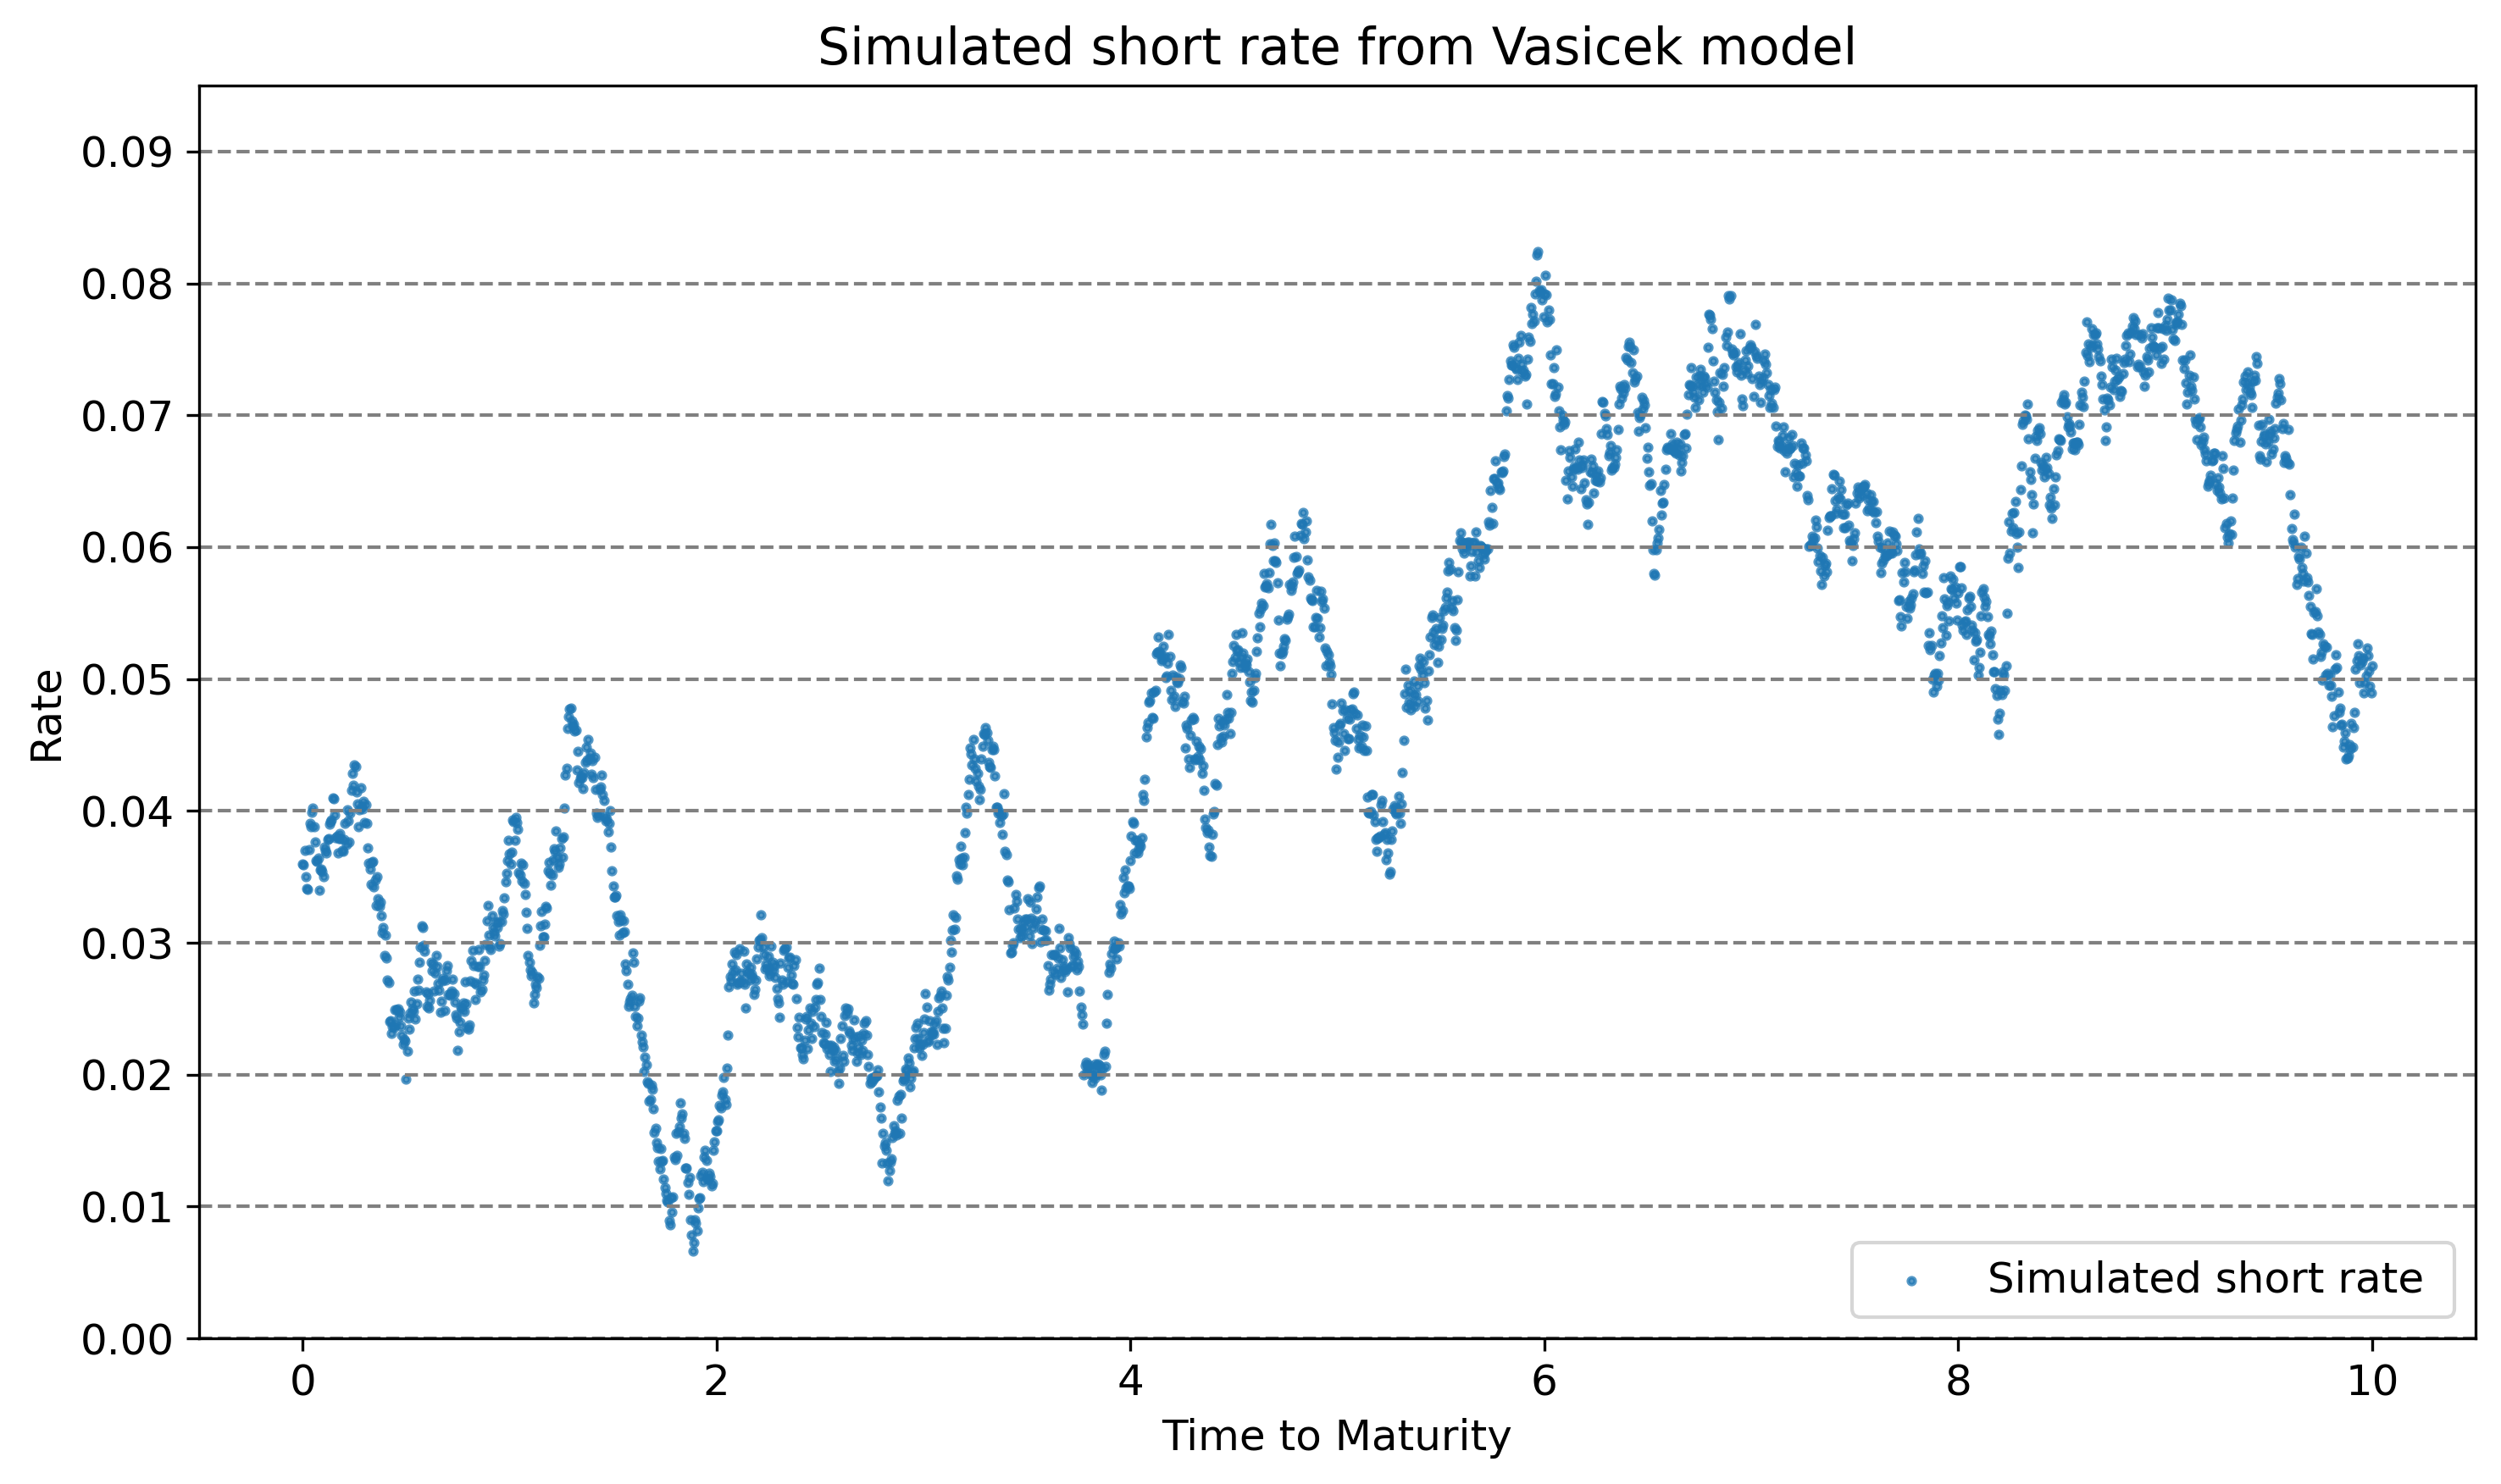

In [9]:
M_simul, T_simul = 2000, 10
t_simul = np.linspace(0,T_simul,M_simul+1)
R_simul = fid.simul_vasicek(r0,a,b,sigma,M_simul,T_simul,method='exact',seed=2025)
simul_plot = [{'label':'Simulated short rate','x':t_simul,'y':R_simul, 's':15},]
plot.rates(simul_plot,title='Simulated short rate from Vasicek model')

#### (b) Construct 95 percent two-sided confidence intervals for the short rate and plot these in the same plot.

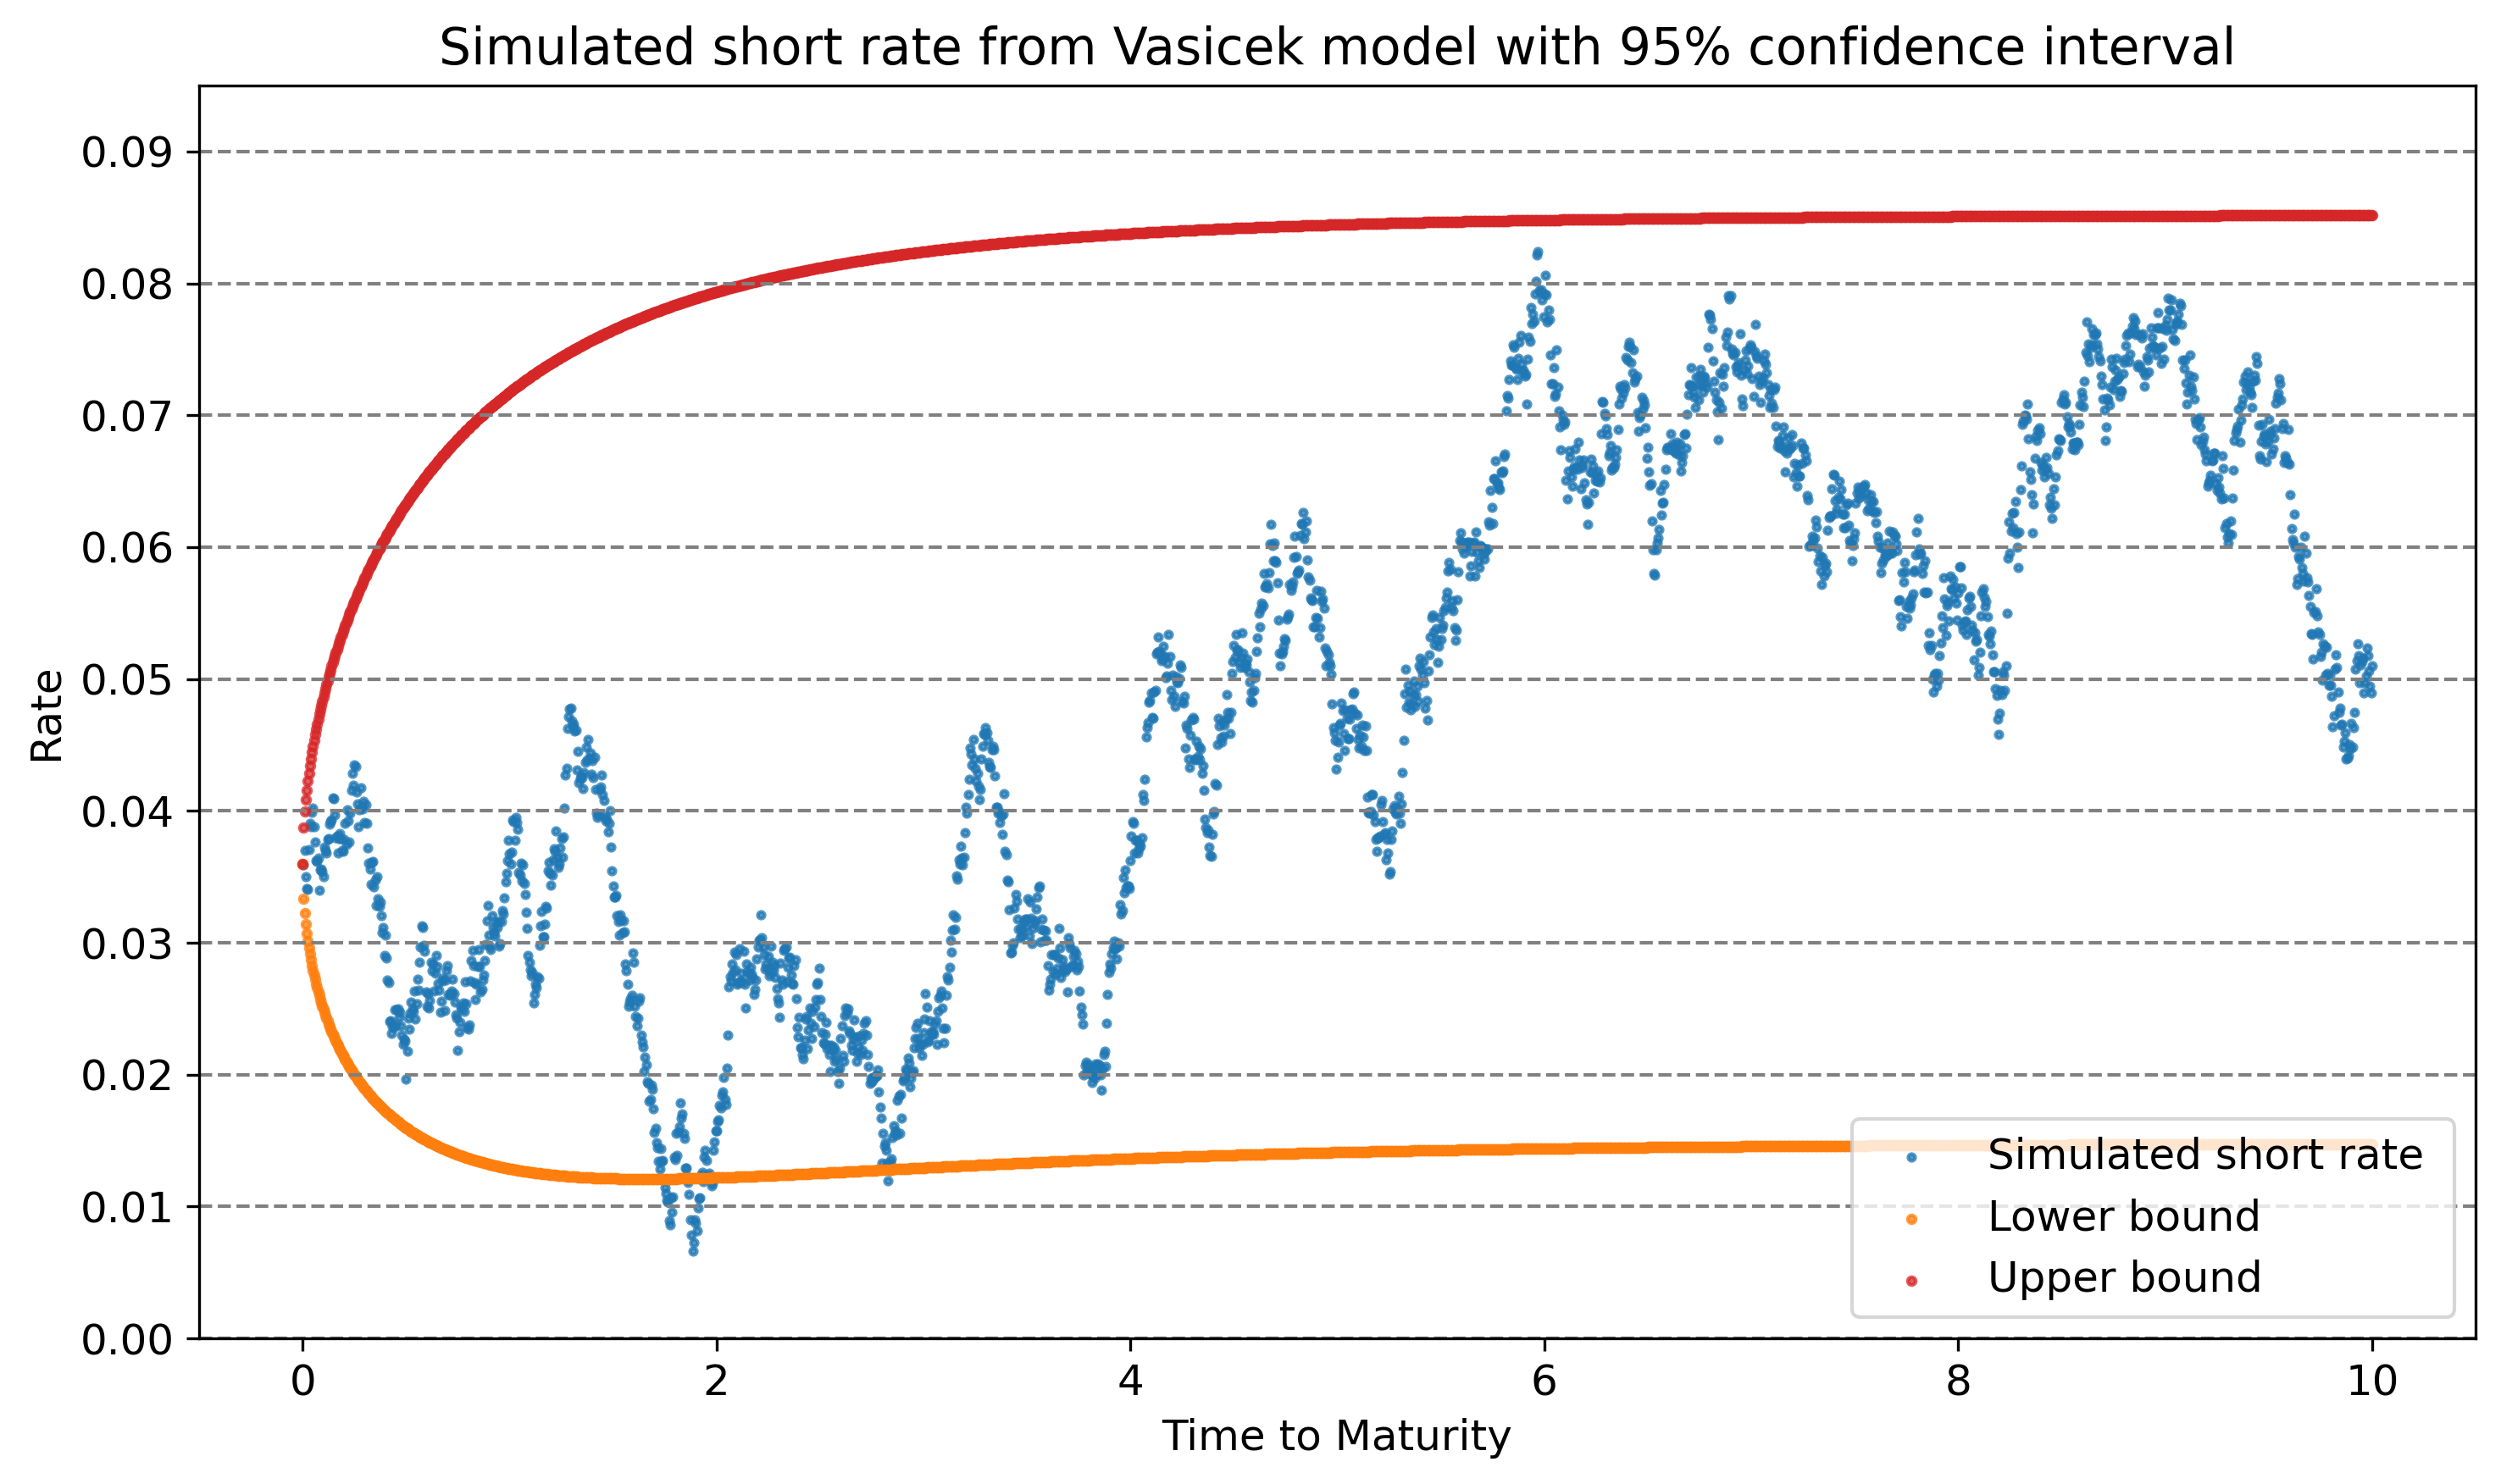

In [10]:
ci_bound = 0.95
lb, ub = fid.ci_vasicek(r0,a,b,sigma,t_simul,ci_bound)
simul_plot.append({'label':'Lower bound','x':t_simul,'y':lb})
simul_plot.append({'label':'Upper bound','x':t_simul,'y':ub})
plot.rates(simul_plot,title='Simulated short rate from Vasicek model with 95% confidence interval')

#### (c) Construct a 95 percent two-sided confidence interval for the short rate under the stationary distribution and plot this confidence interval in the same plot. Based on the plot, how large should $t$ for us to say that the distribution of $r_t$ is roughly the same as that of the stationary distribution? How does this change if you change the parameters of the Vasicek model?

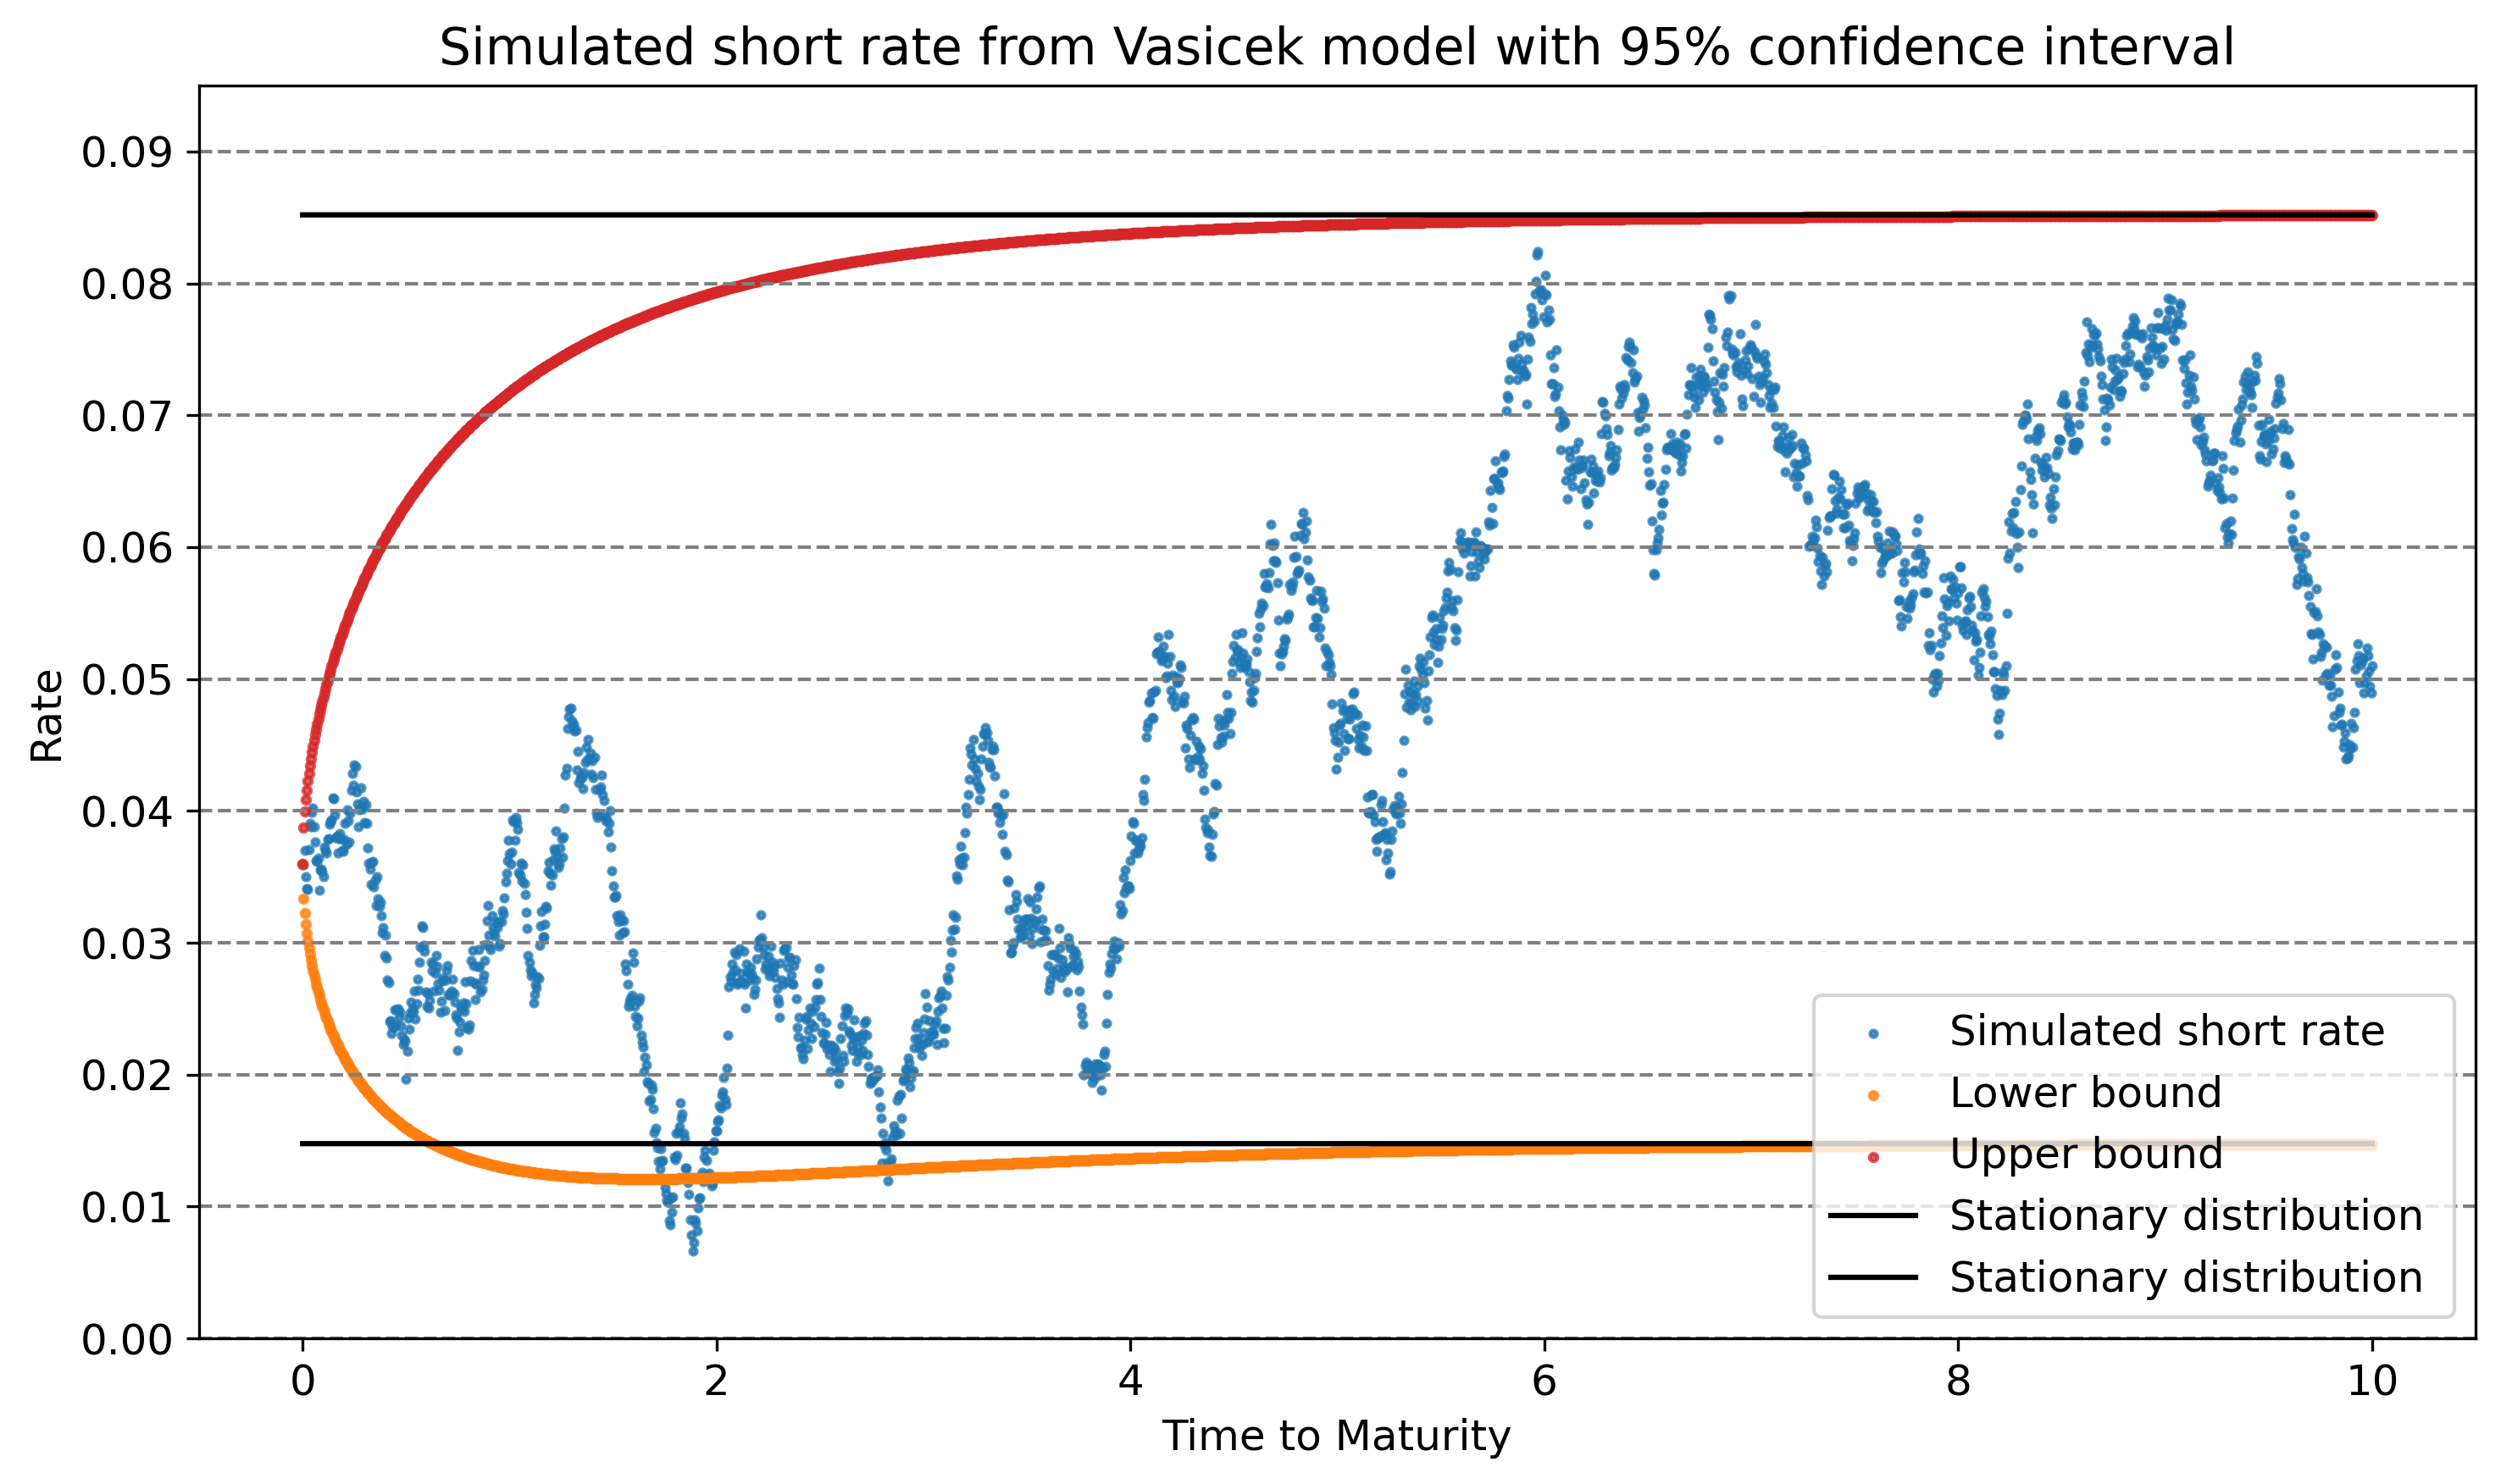

In [11]:
lb_sd, ub_sd = fid.ci_vasicek(r0,a,b,sigma,100,ci_bound) # assuming stationary distribution after 100 years
simul_plot.append({'label':'Stationary distribution','x':t_simul,'y':lb_sd*np.ones_like(t_simul), 'type':'line', 'color':'black'})
simul_plot.append({'label':'Stationary distribution','x':t_simul,'y':ub_sd*np.ones_like(t_simul), 'type':'line', 'color':'black'})
plot.rates(simul_plot,title='Simulated short rate from Vasicek model with 95% confidence interval')

#### (d) Explain the inaccuracies of the proposed simulation scheme and if you can, suggest a different method that would be better.
I suppose it is Euler/Milstein vs Exact simulation – but here exact is used...

## Problem 6 - Pricing a swaption
We will now introduce a $2Y8Y$ payer swaption with a strike of $K = 0.05$. That is, we will introduce a swaption that gives the owner the right but not obligation to enter into an $8Y$ payer swap at exercise in $T_n = 2$ years so that $T_N = 10$. To compute the price of this swaption, you will need to use simulation.

#### (a) Argue that the payoff function $\chi(T_n)$ and the discounted payoff function $\chi(T_n)$ of the payer swaption are $$ \begin{split} \chi(T_n) &= S_n^N(T_n)(R_n^N(T_n)-K)_+ \\ \tilde{\chi}(T_n) &= \exp\{-\int_0^{T_n}r_tdt\}\chi(T_n) \end{split} $$

***See ChatGPT for proposed solution***

#### (b) Find a method to compute the price at $t = 0$ of the swaption by simulating at least $N = 1000$ trajectories and having at least $M = 1000$ steps in your simulation.

In [12]:
T_n, T_N = 2, 10 # 2Y8Y swaption
M_simul_swaption, N_simul, T_simul_swaption = 4000, 50000, T_n
chi, price_swaption_simul, price_swaption_plot = np.zeros([N_simul]), np.zeros([N_simul]), np.zeros([N_simul])
T_swaption = np.array([i*0.25 for i in range(0,33)])
np.random.seed(2025)
for i in range(0,N_simul):
    r_simul_swaption = fid.simul_vasicek(r0,a,b,sigma,M,T_n,method = "exact",seed = None)
    p_swaption = fid.zcb_price_vasicek(r_simul_swaption[-1],a,b,sigma,T_swaption)
    R_swaption, S_swaption = fid.swap_rate_from_zcb_prices(0,0,T_N-T_n,"annual",T_swaption,p_swaption,float_freq = "quarterly")
    chi[i] = max(R_swaption - strike,0)*S_swaption
    price_swaption_simul[i] = np.exp(-(T_simul_swaption/M_simul_swaption)*sum(r_simul_swaption))*chi[i]
    price_swaption_plot[i] = sum(price_swaption_simul[0:i+1])/(i+1)
print(f"price_swaption: {price_swaption_plot[-1]*10000} bps")

price_swaption: 100.42275123005045 bps


#### (c) Investigate if the price you have computed is accurate by plotting the value of the derivative for various choices of $N$.

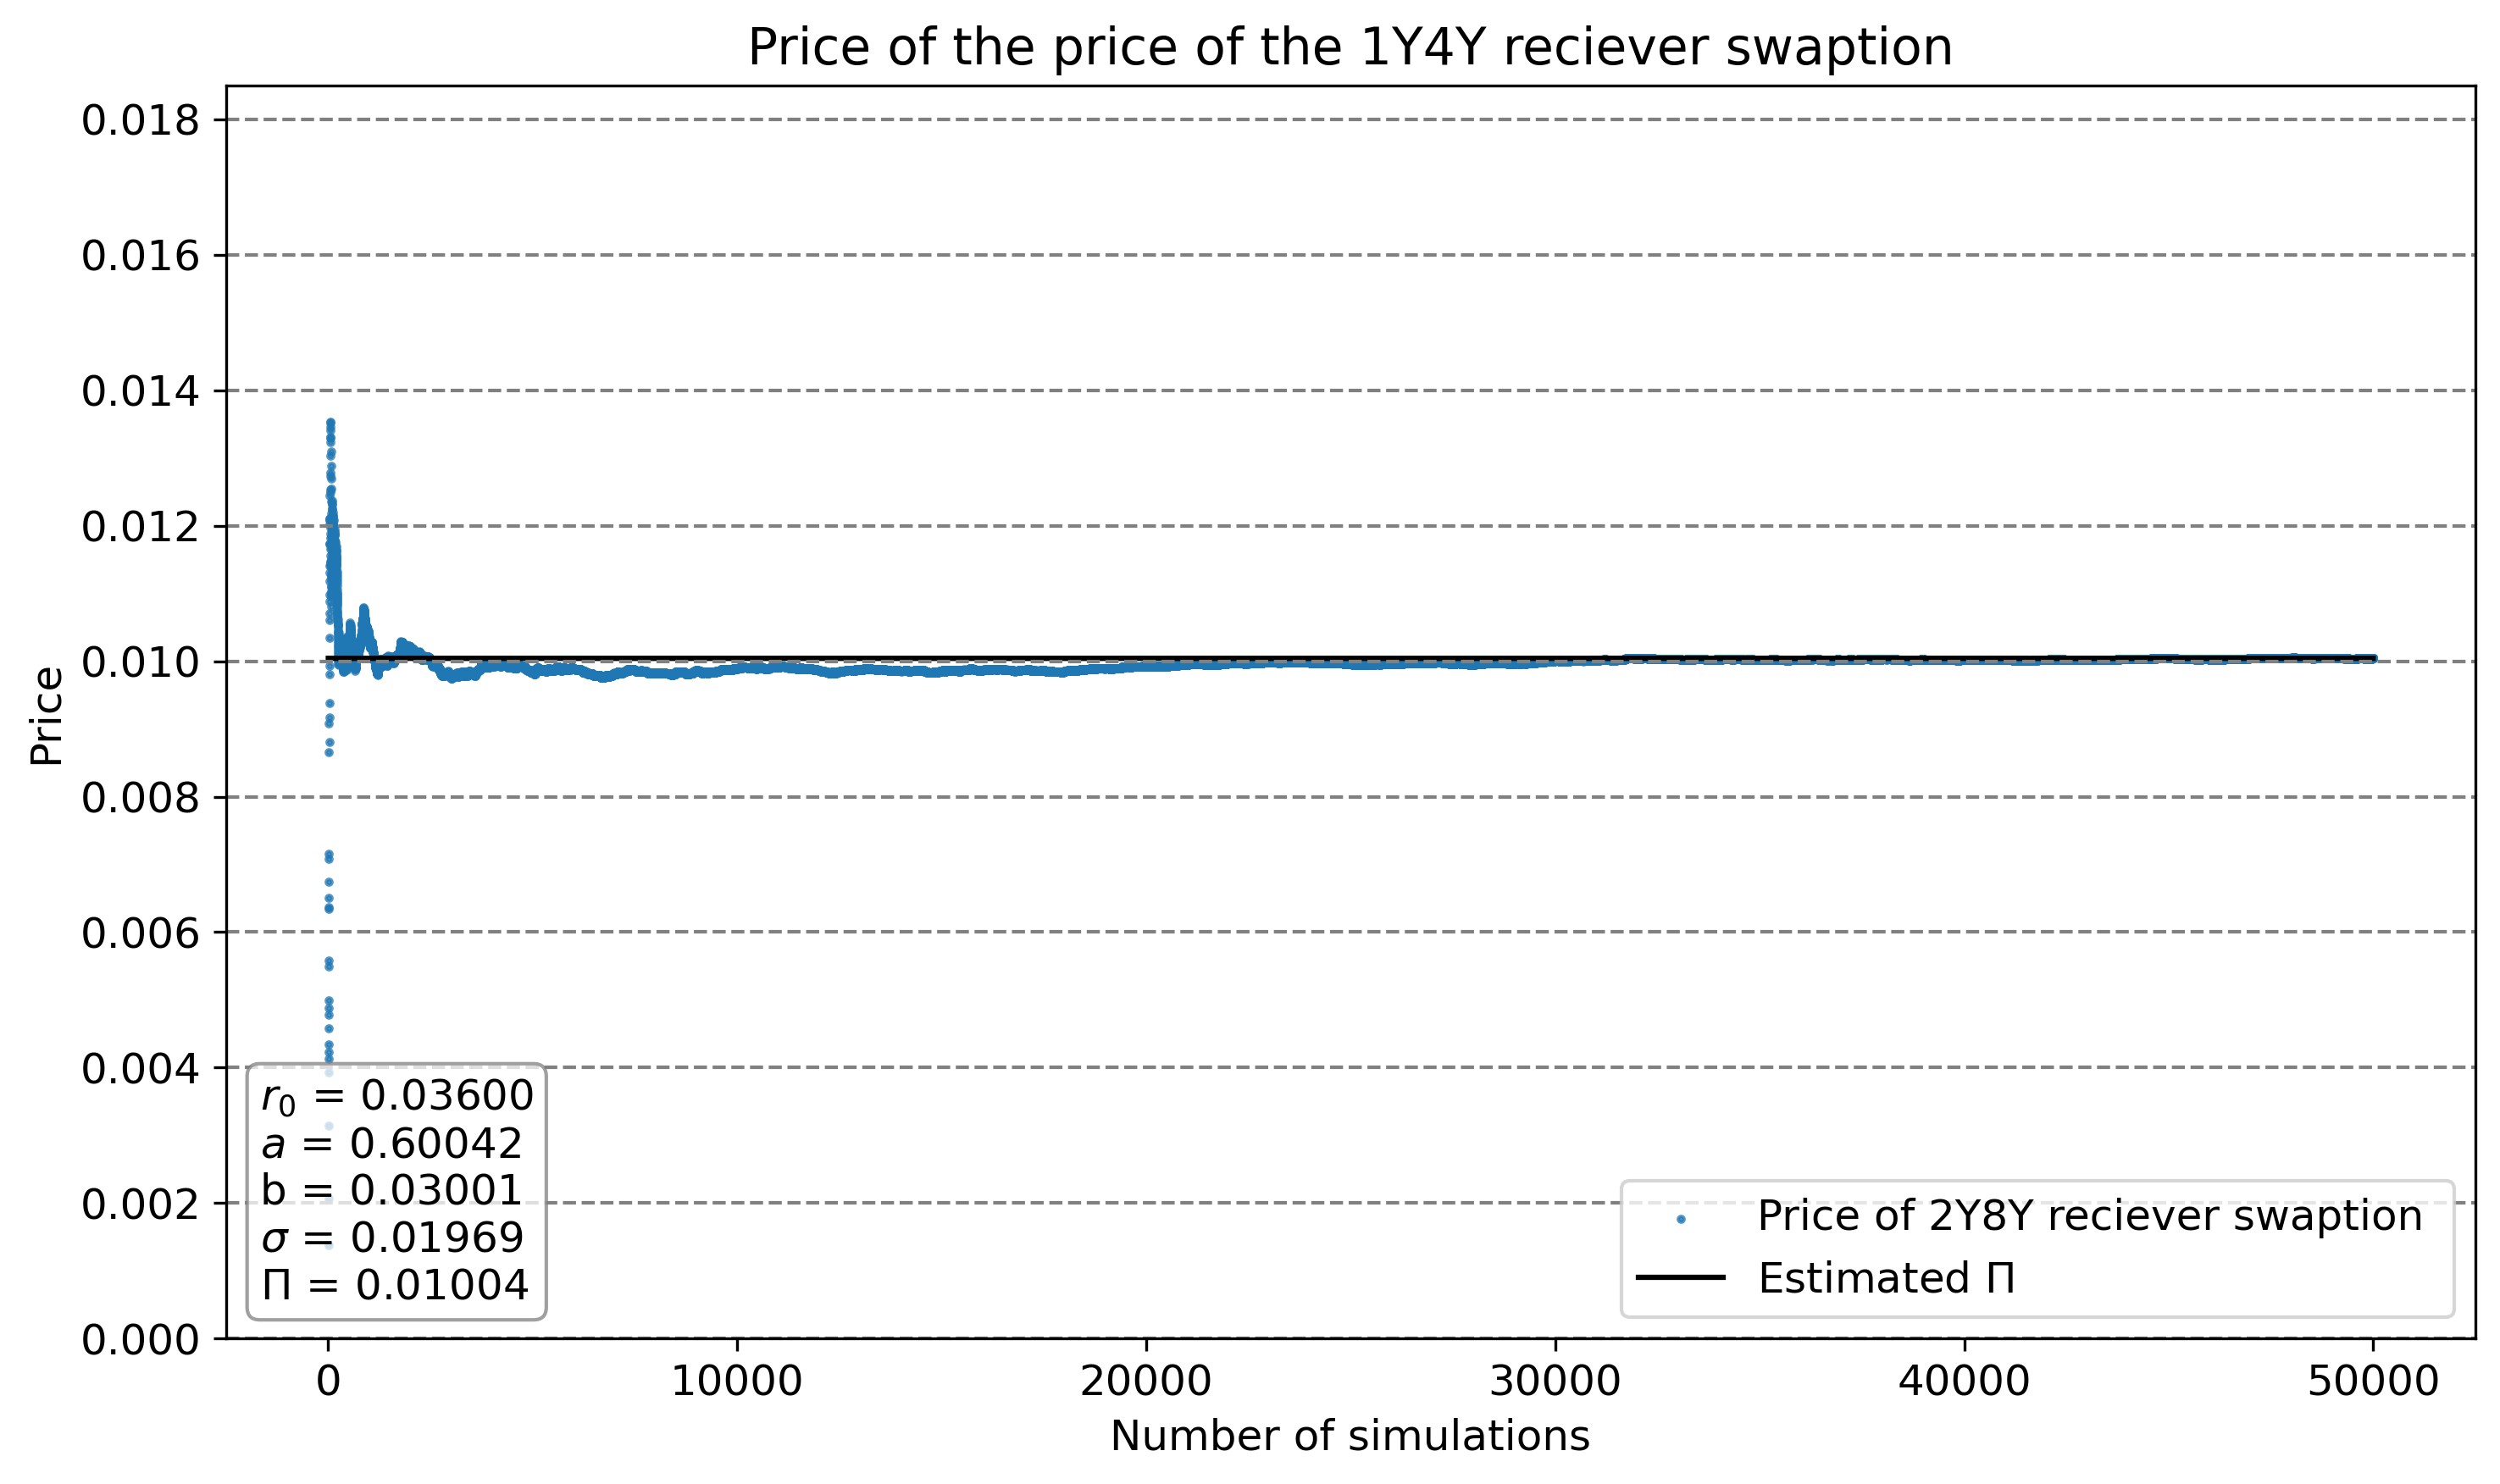

In [13]:
swap_plot = [{'label':'Price of 2Y8Y reciever swaption','x':np.arange(1,N_simul+1),'y':price_swaption_plot, 's':10},
             {'label':'Estimated $\Pi$','x':np.arange(1,N_simul+1),'y':price_swaption_plot[-1]*np.ones([N_simul]),'type':'line', 'color':'black'}]
text = {'$r_0$':r0,'$a$':a,'b':b, '$\sigma$':sigma, '$\Pi$':price_swaption_plot[-1]}
plot.rates(swap_plot, title='Price of the price of the 1Y4Y reciever swaption',xlabel='Number of simulations', ylabel='Price',text=text)

#### (d) Explain how the price of the swaption depends on $\sigma$, $T_n$, $T_N$ and of course $K$.
- $\sigma \uparrow \Rightarrow$ Swaption Price $\uparrow$ 
- $T_n \uparrow \Rightarrow$ Swaption Price $\uparrow$
- $T_N \uparrow \Rightarrow$ Swaption Price $\uparrow$
- $K \uparrow \Rightarrow$ Swaption Price $\downarrow$

#### (e) Discuss if the payer swaption could potentially have helped the company from Problem 5 manage their interest rate risk
***See ChatGPT for proposed solution***